[  0 255]


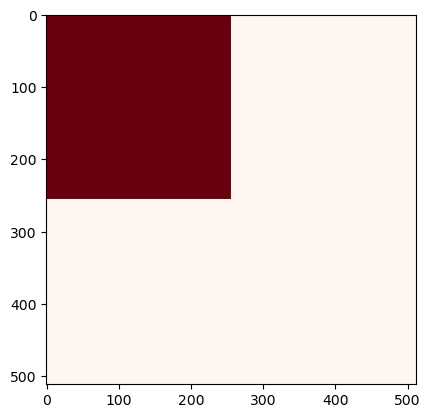

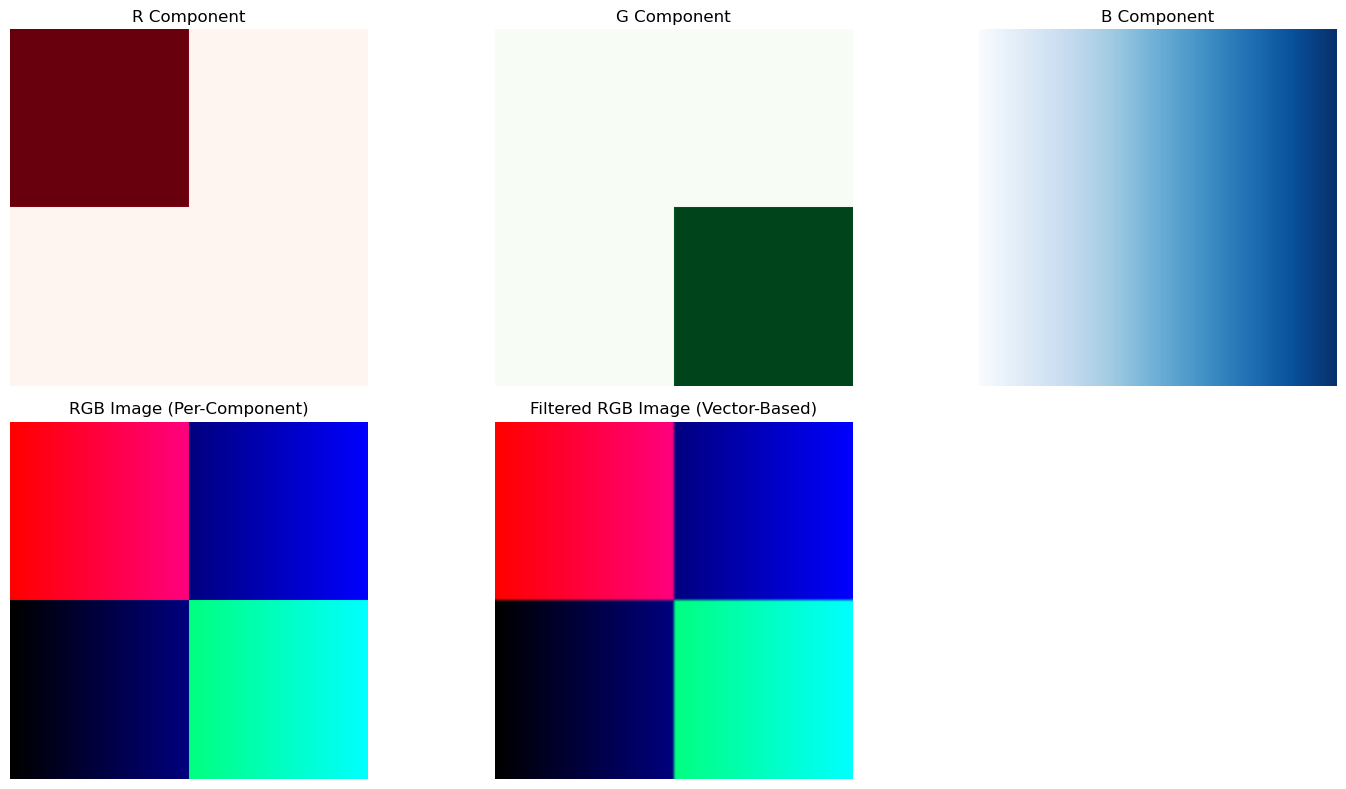

In [11]:
"""
# Image Processing with Grayscale and RGB Components

This program demonstrates the basic principles of image processing, focusing on combining grayscale image bands 
into an RGB image and applying filtering techniques to process the combined image.

## Key Concepts:

1. **Grayscale Image Bands (R, G, B):**
   - Grayscale images represent intensity values for a single color channel (Red, Green, or Blue) in an image.
   - These grayscale bands can be combined to recreate the original color image using the RGB color model.

2. **RGB Color Model:**
   - The RGB model represents images as a combination of three primary color channels (Red, Green, and Blue).
   - In OpenCV, the default order for RGB images is BGR (Blue, Green, Red). To visualize correctly in Matplotlib, 
     the BGR image must be converted to RGB format.

3. **Vector-Based Image Processing:**
   - Operations such as filtering can be applied uniformly to all color components (R, G, B).
   - Filtering enhances image quality by reducing noise or applying effects like blurring or sharpening.

4. **Filtering with Convolution Kernels:**
   - A kernel is a small matrix used to apply transformations to an image through convolution.
   - In this program, a smoothing filter (averaging kernel) is used to blur the image and reduce noise.

5. **Error Handling:**
   - The program ensures the presence of all required grayscale images (R, G, B) before proceeding with further operations. 
     If any image is missing, the script raises an error.

6. **Visualization with Matplotlib:**
   - The program visualizes intermediate grayscale components and the final RGB images using Matplotlib.
   - Color maps ('Reds', 'Greens', 'Blues') are used for intuitive representation of individual components.

7. **Dependencies:**
   - `cv2` (OpenCV): For loading and manipulating images.
   - `numpy`: For numerical operations (e.g., creating the kernel).
   - `matplotlib.pyplot`: For visualizing images and their components.

---

## Workflow:

1. **Input Data:**
   - Load grayscale images for R, G, and B channels from a specified directory.

2. **Image Merging:**
   - Combine grayscale images into a single RGB image using OpenCV's `cv2.merge` function.

3. **Filtering:**
   - Apply a smoothing filter to the RGB image using a predefined kernel.

4. **Visualization:**
   - Display the grayscale components, original RGB image, and the filtered RGB image for comparison.

This program serves as an example of per-component and vector-based image processing workflows, which are 
common in fields like computer vision and digital image analysis.
"""

import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Define the data directory
data_dir = os.path.join(os.getcwd(), 'data', 'images')

# Load example grayscale images for R, G, and B components from the directory
R = cv2.imread(os.path.join(data_dir, 'red_band.jpg'), cv2.IMREAD_GRAYSCALE)
G = cv2.imread(os.path.join(data_dir, 'green_band.jpg'), cv2.IMREAD_GRAYSCALE)
B = cv2.imread(os.path.join(data_dir, 'blue_band.jpg'), cv2.IMREAD_GRAYSCALE)

# print(np.unique(R))  # Prints all unique values in the red channel
# plt.imshow(R, cmap='Reds')
# plt.show()


# Check if images are loaded
if R is None or G is None or B is None:
    raise FileNotFoundError(f"Ensure all R, G, and B band images are available in {data_dir}.")

# Combine into an RGB image
rgb_image = cv2.merge([B, G, R])

# Apply a filter to the RGB image
kernel = np.ones((5, 5), np.float32) / 25
filtered_image = cv2.filter2D(rgb_image, -1, kernel)

# Visualization
plt.figure(figsize=(15, 8))

# Display the R component
plt.subplot(2, 3, 1)
plt.imshow(R, cmap='Reds')
plt.title("R Component")
plt.axis('off')

# Display the G component
plt.subplot(2, 3, 2)
plt.imshow(G, cmap='Greens')
plt.title("G Component")
plt.axis('off')

# Display the B component
plt.subplot(2, 3, 3)
plt.imshow(B, cmap='Blues')
plt.title("B Component")
plt.axis('off')

# Display the original RGB image
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB))
plt.title("RGB Image (Per-Component)")
plt.axis('off')

# Display the filtered RGB image
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(filtered_image, cv2.COLOR_BGR2RGB))
plt.title("Filtered RGB Image (Vector-Based)")
plt.axis('off')

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()
